## **EDA/Preprocessing**

*Importing Libraries*

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel("/content/Stock price.xlsx")

*Successfully loaded the data*

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


*Finding info of data*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


*Finding null values*

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.shape

(1009, 7)

No duplicates found in the dataset

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1009, 7)

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


# **Visualization**

*Heat map*

<ipython-input-10-dd73e8ae7eaa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


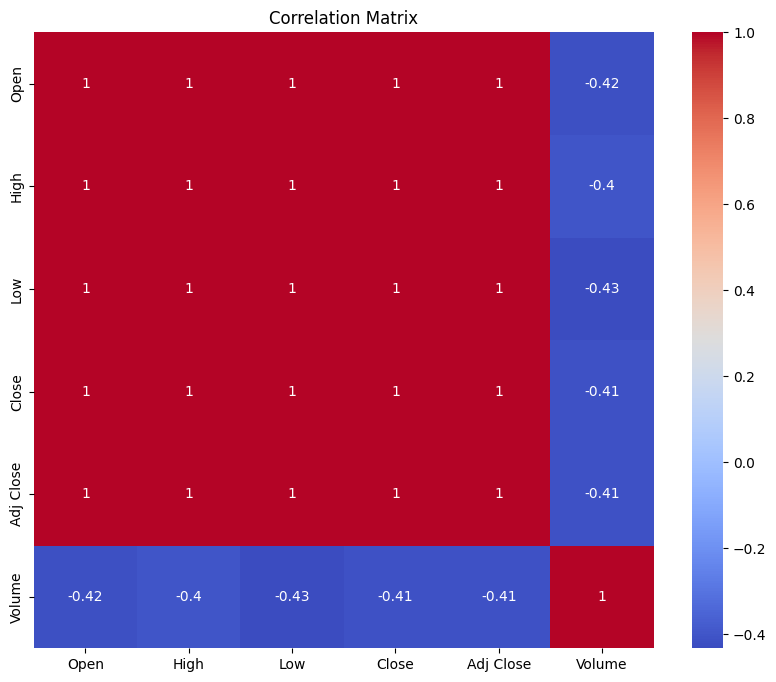

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

*Removing Adj Close as its values are pretty much same as target feature*

In [ ]:
df.drop(["Adj Close"], axis=1, inplace=True)

In [ ]:
df.shape

(1009, 6)

*Histogram*

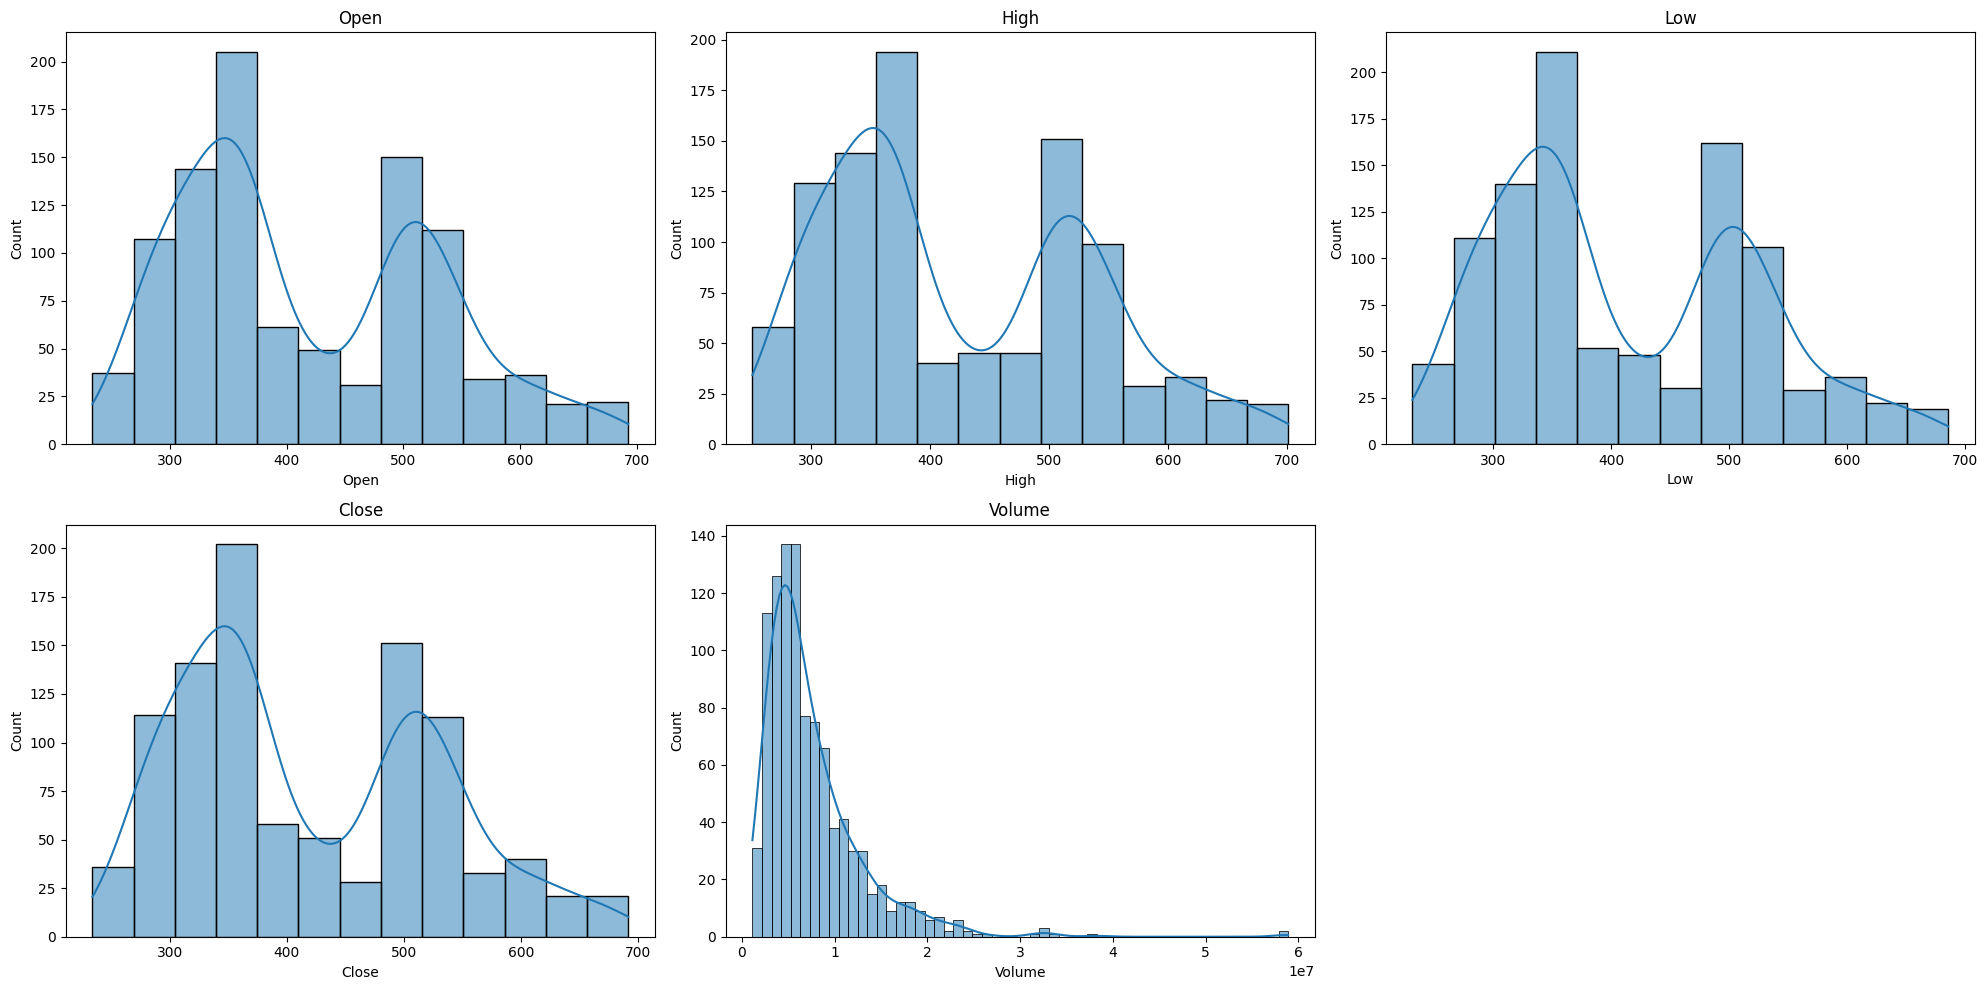

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.figure(figsize=(20, 10))

for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

Normailizing the data using MinMaxScaler

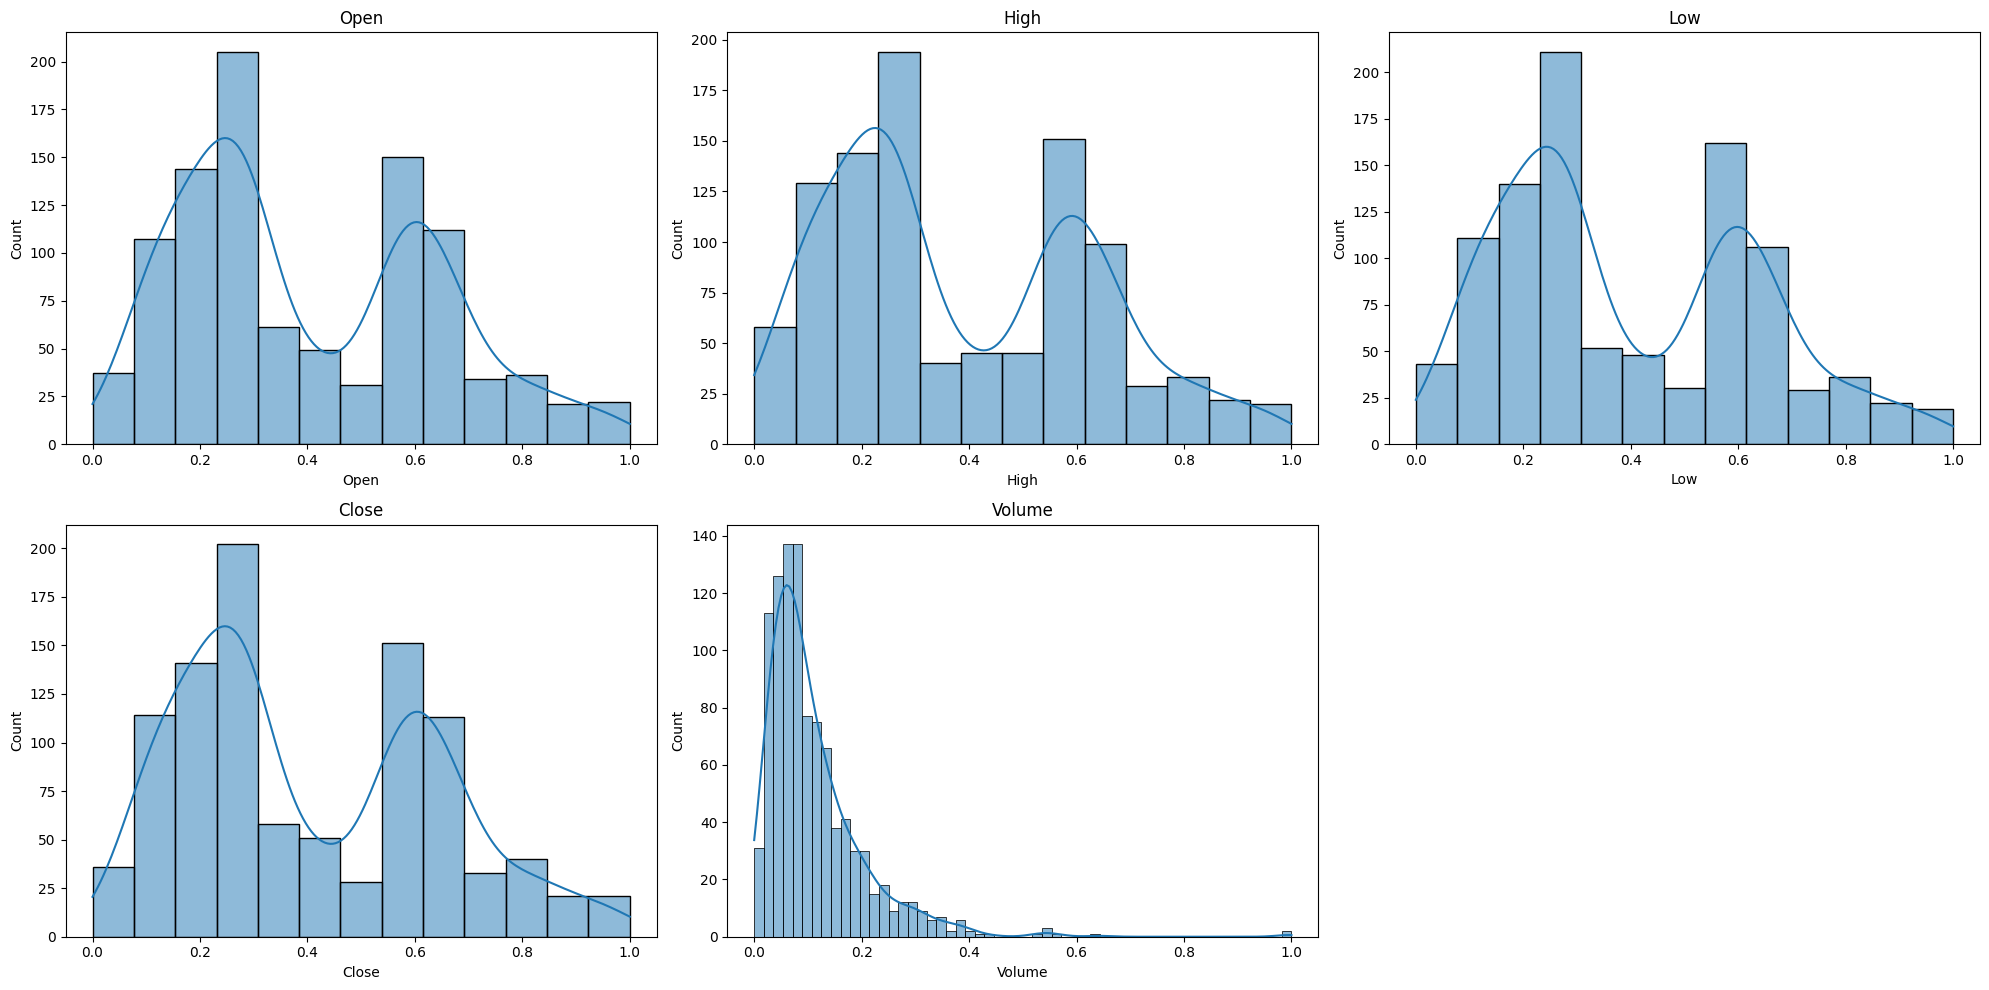

In [ ]:
from sklearn.preprocessing import MinMaxScaler

features = ['Open', 'High', 'Low', 'Close', 'Volume']

scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

plt.figure(figsize=(20, 10))

for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

*Boxplot*

<ipython-input-15-273e95aba42b>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


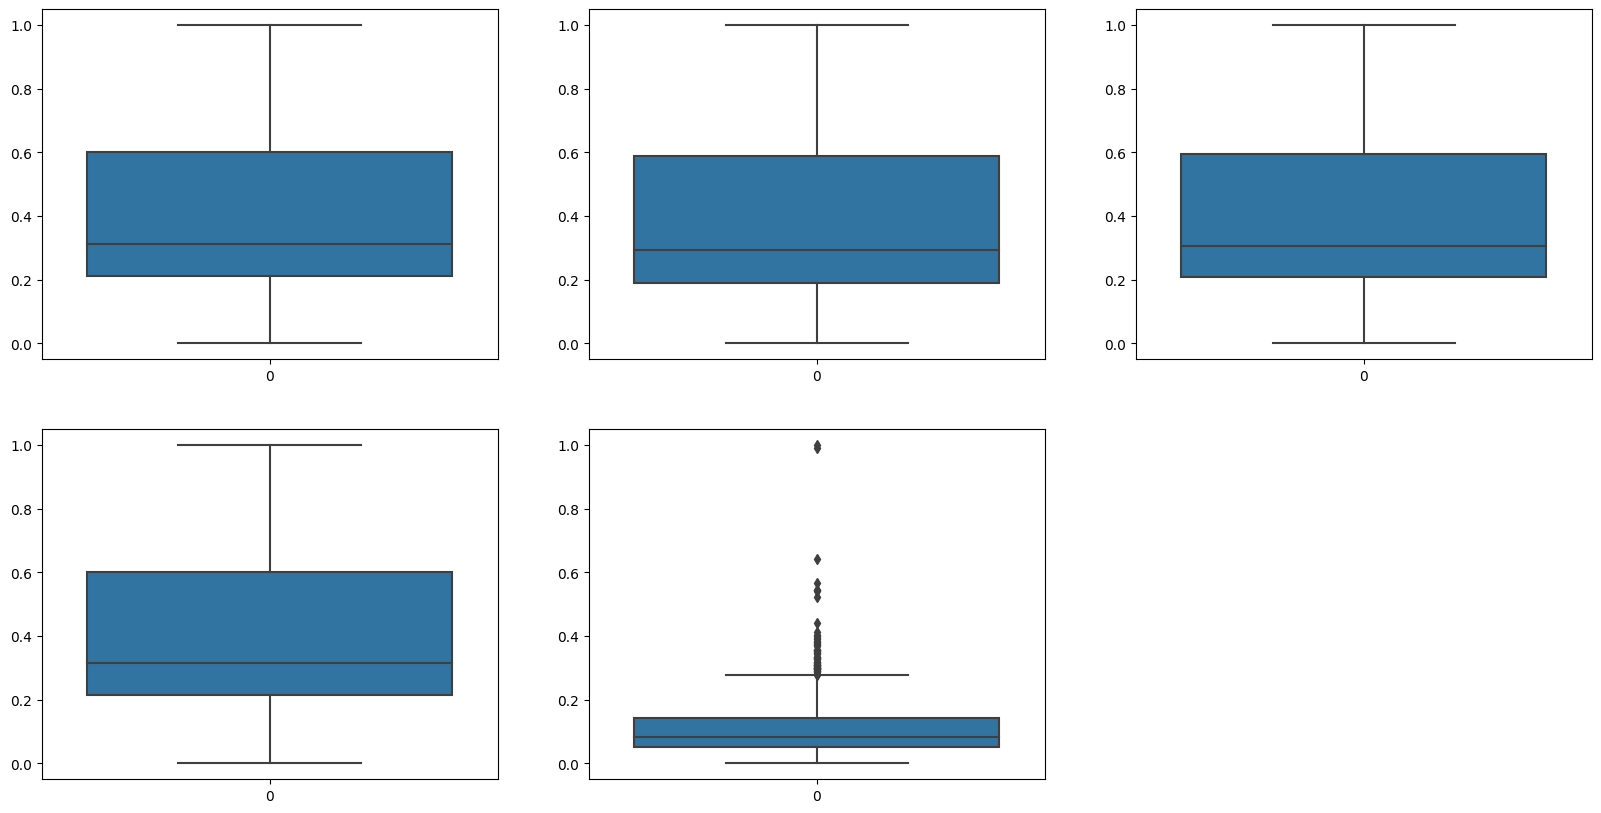

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

# **Model creation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day

*Line graph*

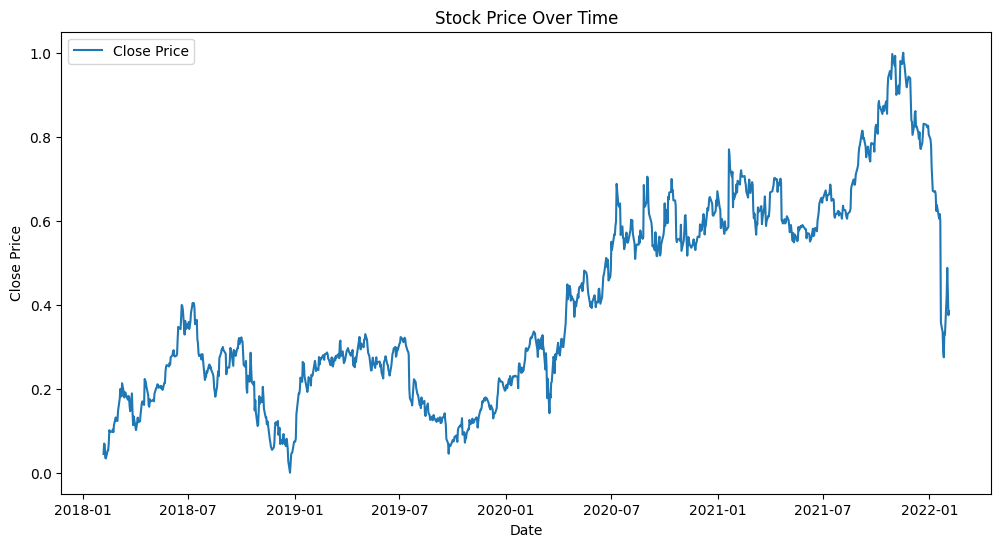

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Over Time')
plt.legend()
plt.show()

In [ ]:
X = df.drop(['Close'], axis=1)
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
reg_model = LinearRegression()

reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {mse ** 0.5}")
print(f"R-squared: {r2}")

Mean Squared Error: 8.304192467207546e-05
Root Mean Squared Error: 0.009112734203962906
R-squared: 0.9964861274599219


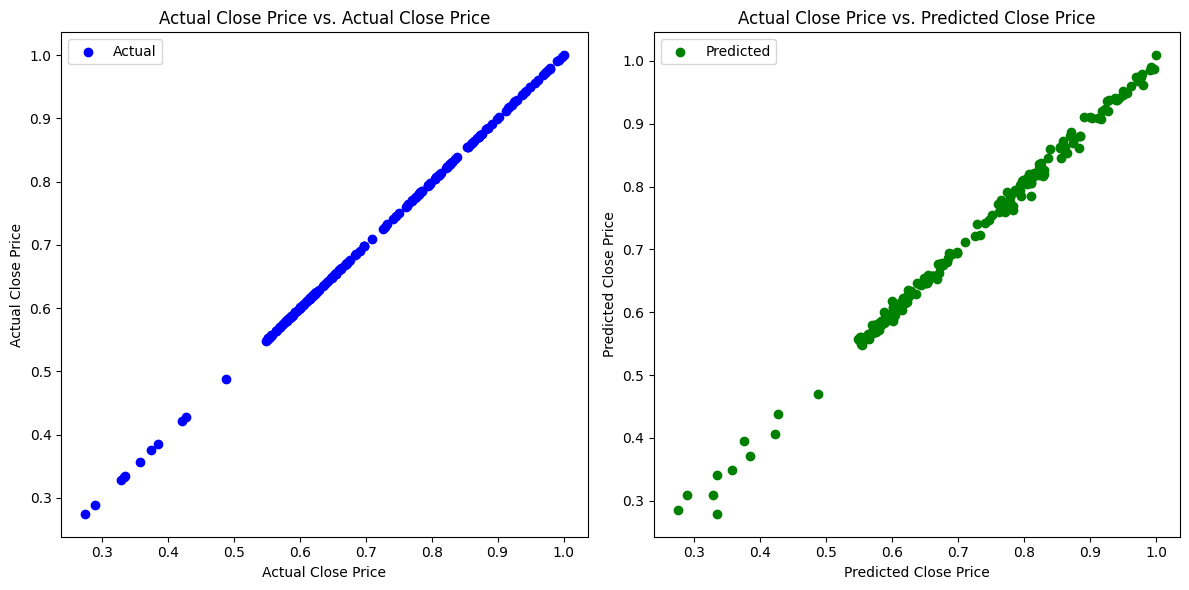

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.xlabel('Actual Close Price')
plt.ylabel('Actual Close Price')
plt.title('Actual Close Price vs. Actual Close Price')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='green', label='Predicted')
plt.xlabel('Predicted Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual Close Price vs. Predicted Close Price')
plt.legend()

plt.tight_layout()
plt.show()

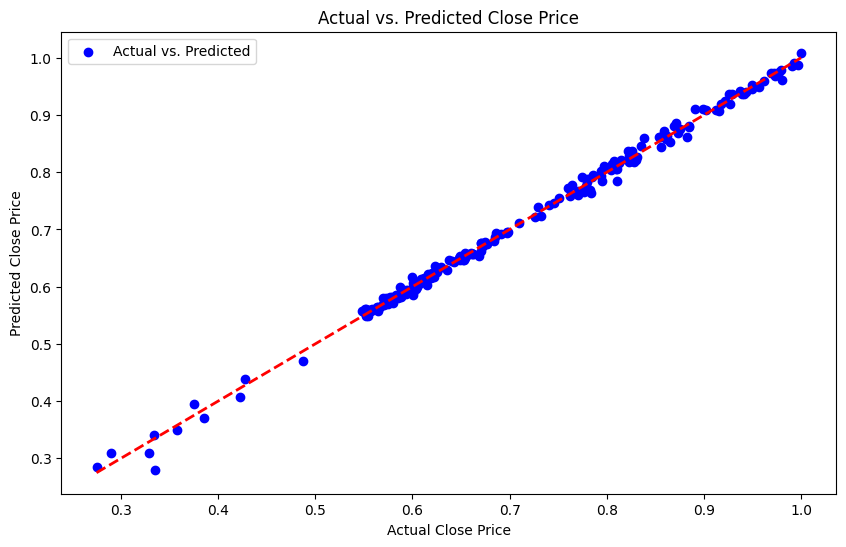

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs. Predicted Close Price')
plt.legend()
plt.show()

Having threshold value as 1, the actual accuracy is predicted

In [ ]:
percentage_threshold = 1
threshold = y_test * (percentage_threshold / 100.0)

correct_predictions = (abs(y_test - y_pred) <= threshold).sum()
total_predictions = len(y_test)

accuracy_percentage = (correct_predictions / total_predictions) * 100

print(f"Accuracy within {percentage_threshold}%: {accuracy_percentage:.2f}%")

Accuracy within 1%: 65.84%
